## Singular Value Decomposition

In [1]:
import numpy as np
import pandas as pd
from scipy import linalg as la
import skimage.io as io
import matplotlib.pyplot as plt

Size: 1347840
Rows: 702
Cols: 1920


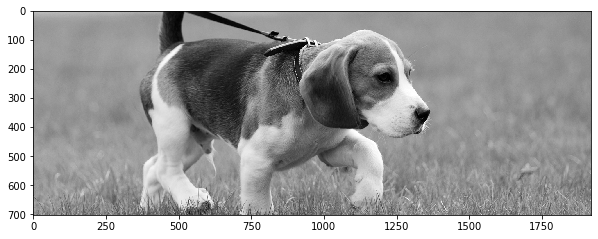

In [52]:
img_g=io.imread('animal1.jpg', as_gray=True) 
plt.figure(figsize = (10, 6))
plt.imshow(img_g, cmap = 'gray')
rows = img_g.shape[0]
cols = img_g.shape[1]
print('Size:',img_g.size)
print('Rows:', rows)
print('Cols:',cols)
plt.show()

In [53]:
# Applying SVD
U, S, V = np.linalg.svd(img_g)

In [55]:
print(U.shape,S.shape,V.shape)

(702, 702) (702,) (1920, 1920)


In [56]:
# Rank
print("Rank :",np.linalg.matrix_rank(img_g) )

Rank : 702


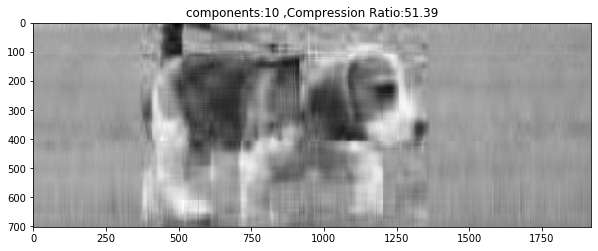

In [57]:
# compressed image for rank = 10
k = 10
plt.figure(figsize = (10, 6))
low_rank = U[:, :k] @ np.diag(S[:k]) @ V[:k, :]   
plt.imshow(low_rank,cmap='gray')
c_r = np.round((rows*cols) /(k*(rows+cols+1)),2)  
plt.title("components:" +str(k) +" ,Compression Ratio:" +str(c_r))
plt.show()       

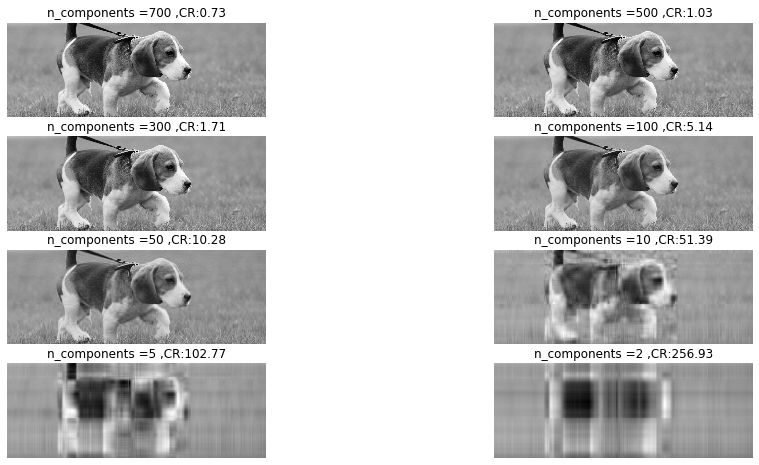

In [59]:
# compressed images for different singularValues
k = [700, 500, 300, 100, 50,10,5,2]

plt.figure(figsize = (16, 8))
for i in range(len(k)):
    low_rank = U[:, :k[i]] @ np.diag(S[:k[i]]) @ V[:k[i], :]
    c_r = np.round((rows*cols) /(k[i]*(rows+cols+1)),2) 
    if(i  == 0):
        plt.subplot(4, 2, i+1), plt.imshow(low_rank, cmap='gray'), plt.axis('off'), plt.title("n_components =" + str(k[i])+" ,CR:" +str(c_r))
    else:
        plt.subplot(4, 2, i+1), plt.imshow(low_rank, cmap = 'gray'), plt.axis('off'), plt.title("n_components =" + str(k[i])+" ,CR:" +str(c_r))
        

Rows : 702
Cols : 1920


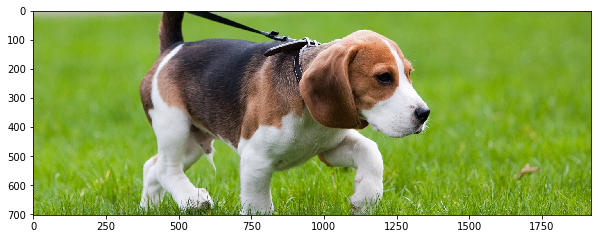

In [60]:
# Colored Image
image=io.imread('animal1.jpg') 
rows = image.shape[0]
cols = image.shape[1]
plt.figure(figsize = (10, 6))
plt.imshow(image)
print("Rows :", rows)
print("Cols :", cols)
plt.show()

In [61]:
#Splitting each channel

aRed = image[:,:,0]
aGreen = image[:,:,1]
aBlue = image[:,:,2]

In [62]:
#Applying SVD on each channel

k = 100   # rank

# SVD for Red channel
Red_u, Red_s, Red_v = np.linalg.svd(aRed)
aRed_compressed = Red_u[:,:k] @ np.diag(Red_s[:k]) @ Red_v[:k, :]
aRed_compressed = aRed_compressed.astype('uint8')
#aRed_compressed.shape

# SVD for Green channel
Green_u, Green_s, Green_v = np.linalg.svd(aGreen)
aGreen_compressed = Green_u[:,:k] @ np.diag(Green_s[:k]) @ Green_v[:k, :]
aGreen_compressed = aGreen_compressed.astype('uint8')

# SVD for Blue channel
Blue_u, Blue_s, Blue_v = np.linalg.svd(aBlue)
aBlue_compressed = Blue_u[:,:k] @ np.diag(Blue_s[:k]) @ Blue_v[:k, :]
aBlue_compressed = aBlue_compressed.astype('uint8')


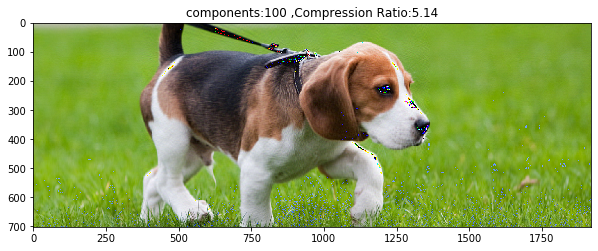

In [63]:
#Compressed Image
compressed_img = np.stack((aRed_compressed,aGreen_compressed,aBlue_compressed),axis=2)
plt.figure(figsize = (10, 6))
c_r = np.round((rows*cols) /(k*(rows+cols+1)),2)  
plt.title("components:" +str(k) +" ,Compression Ratio:" +str(c_r))
plt.imshow(compressed_img)
plt.show()

In [48]:
def compression(r,b,g,k):
    # SVD for Red channel
    Red_u, Red_s, Red_v = np.linalg.svd(aRed)
    aRed_compressed = Red_u[:,:k] @ np.diag(Red_s[:k]) @ Red_v[:k, :]
    aRed_compressed = aRed_compressed.astype('uint8')
    #aRed_compressed.shape

    # SVD for Green channel
    Green_u, Green_s, Green_v = np.linalg.svd(aGreen)
    aGreen_compressed = Green_u[:,:k] @ np.diag(Green_s[:k]) @ Green_v[:k, :]
    aGreen_compressed = aGreen_compressed.astype('uint8')

    # SVD for Blue channel
    Blue_u, Blue_s, Blue_v = np.linalg.svd(aBlue)
    aBlue_compressed = Blue_u[:,:k] @ np.diag(Blue_s[:k]) @ Blue_v[:k, :]
    aBlue_compressed = aBlue_compressed.astype('uint8')

    compressed_img = np.stack((aRed_compressed,aGreen_compressed,aBlue_compressed),axis=2)
      
    return compressed_img

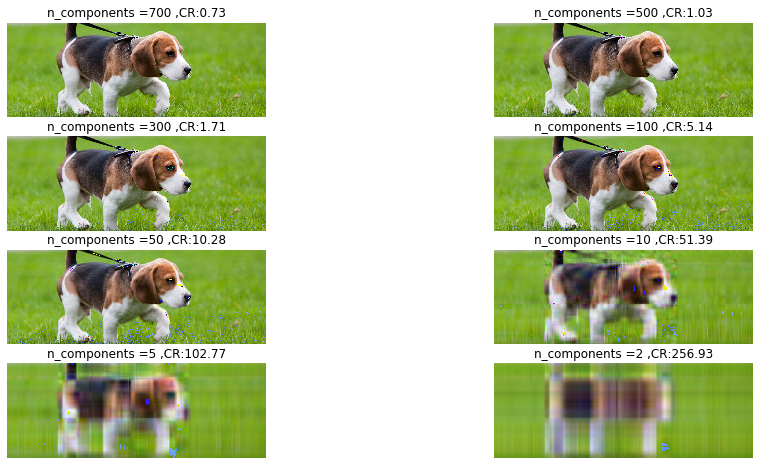

In [65]:
k = [700, 500, 300, 100, 50,10,5,2]   # rank
plt.figure(figsize = (16, 8))

for i in range(len(k)):
    low_rank = compression(aRed,aGreen,aBlue,k[i])
    c_r = np.round((rows*cols) /(k[i]*(rows+cols+1)),2) 
    if(i  == 0):
        plt.subplot(4, 2, i+1), plt.imshow(low_rank), plt.axis('off'), plt.title("n_components =" + str(k[i])+" ,CR:" +str(c_r))
    else:
        plt.subplot(4, 2, i+1), plt.imshow(low_rank), plt.axis('off'), plt.title("n_components =" + str(k[i])+" ,CR:" +str(c_r))
        